In [10]:
import sys
import logging
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

from app.parse_cl_args import get_args, daterange_from_cl_args
from app.LogsProcessor import LogsProcessor
from app.helpers import get_date_range

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                    handlers=[logging.StreamHandler()]
                    )
start = dt.date(2020, 1, 1)
end = dt.date(2020, 12, 31)
date_range = get_date_range(start, end)
logs_processor = LogsProcessor(date_range, 'time_logs')
logs = logs_processor.get_timelogs()
logs_df = logs_processor.create_df(logs)

2020-04-20 11:09:45,680 - app.LogsProcessor - INFO - Correct logs: 2  Invalid logs: 0


In [11]:
logs_df.head()

,date,time_start,time_end,categories,duration
0,2020-04-03,2020-04-03 07:00:00,2020-04-03 07:25:00,fasljk,00:25:00
1,2020-04-03,2020-04-03 08:00:00,2020-04-03 09:01:00,"personal,programming",01:01:00
2,2020-04-03,2020-04-03 13:11:00,2020-04-03 13:42:00,"math,school",00:31:00
3,2020-04-03,2020-04-03 14:14:00,2020-04-03 14:58:00,"freelance,programming",00:44:00
4,2020-04-03,2020-04-03 15:40:00,2020-04-03 16:40:00,"exercise,run",01:00:00


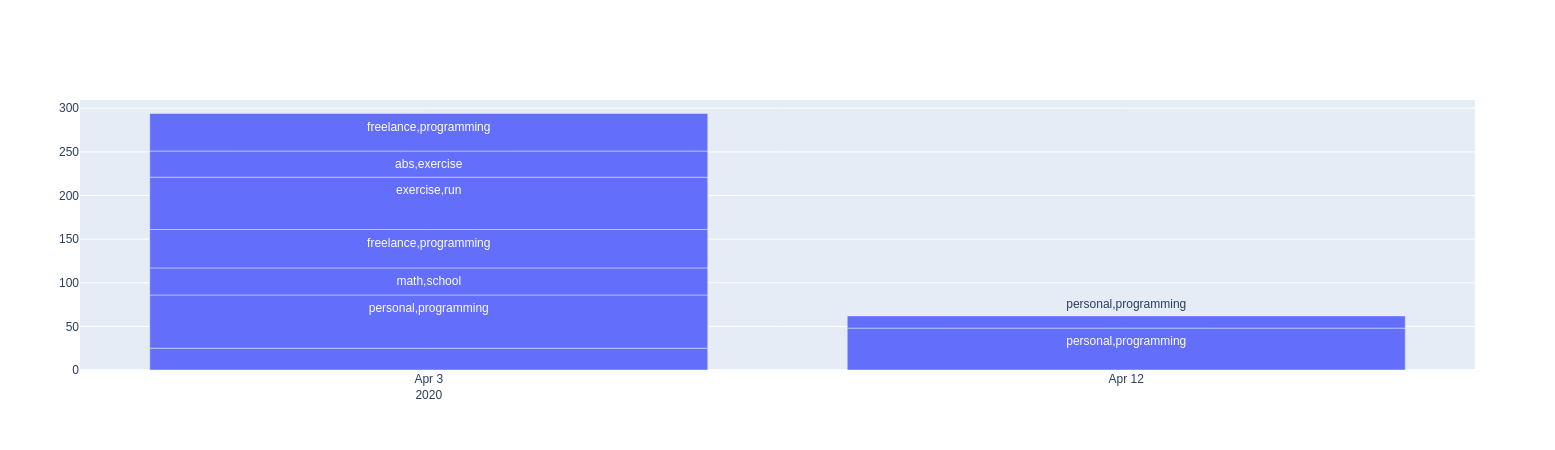

In [12]:
fig = go.Figure([go.Bar(x=logs_df['date'],
                        y=logs_df['duration'].dt.total_seconds()/60,
                        text=logs_df['categories'],
                        textposition='auto',
                        hovertext=logs_df['time_start'].dt.strftime('%H:%M')
                       )])
fig.show()